
### Problemaa 4
Deci din alea 10 training cycleuri avem

$
\bar{x} = 3.6
$
ore de training, mean-ul

cu startd deviation de
$
\sigma_x = 0.5
$

$
\bar{y} = 82\%
$
acuratetea in medie

cu standard deviation de
$
\sigma_y = 14\%
$


Si corelatia betwixt \s these two:
$
r = 0.62
$

a) Regression line-u e de forma: $y = xm+b$ ,

Unde panta e:
$
m = r \frac{\sigma_y}{\sigma_x}
$


In [78]:
mean_training_time = 3.6
std_training_time = 0.5
mean_accuracy = 82
std_accuracy = 14
correlation = 0.62

m = correlation * (std_accuracy / std_training_time)

print(f"The slope of the regression line is: {m}")

The slope of the regression line is: 17.36


y intercept-u adica b-u e:
$
b = \bar{y} - m \bar{x}
$

In [79]:
b = mean_accuracy - m * mean_training_time
print(f"The y intercept is: {b}")

The y intercept is: 19.503999999999998


In [80]:
print(f"Regression line equation: accuracy = {m:.2f} * training_time + {b:.2f}")

Regression line equation: accuracy = 17.36 * training_time + 19.50


Sii cam asa arata linia:

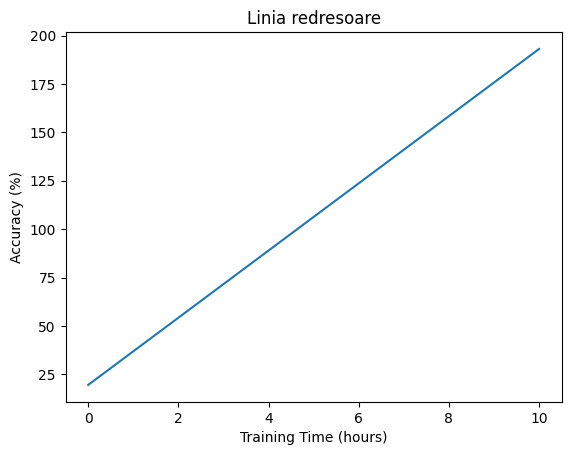

In [81]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = m * x + b

plt.plot(x, y)
plt.xlabel("Training Time (hours)")
plt.ylabel("Accuracy (%)")
plt.title("Linia redresoare")
plt.show()


(b)" In the next cycle, the model is trained for 4 hours. Predict the model’s accuracy."

In [82]:
predicted_accuracy = m * 4 + b
print(f"The predicted accuracy is: {predicted_accuracy:.2f}")

The predicted accuracy is: 88.94


c) Nu prea cred ca arata mare chestie fiind doar o linie dreapta, dar sa vedem coefficient of determination asta:

In [83]:
r_squared = correlation ** 2
print(f"The coefficient of determination is: {r_squared}")

The coefficient of determination is: 0.3844


Adica doar 38.44% din variatia acuratetii e explicata de variatia timpului de training. Nu prea arata mare lucru pentru ca restul de


In [84]:
print(1-r_squared)

0.6155999999999999


% poa sa fie cat de bune sunt datele de sample pe care le-am luat, sau ce fel de arhitectura are modelu ala de ML.

"Moderate fit" creca i-ar zice in cazul asta ))

Mai bine faceam un model polynomial sau orice neliniar, mai complex un pic.

Dar daca mai schimbam din corelatie sa cum afecteaza?

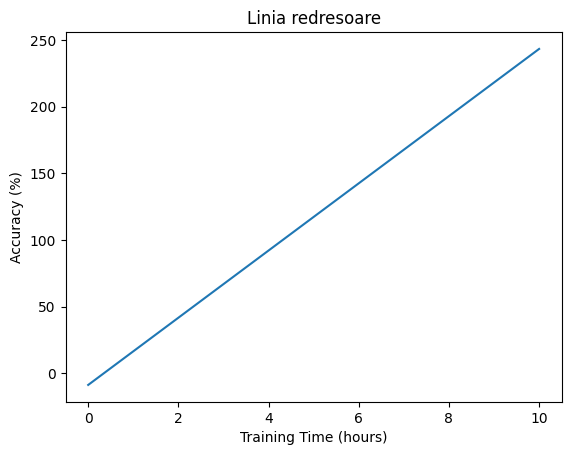

In [85]:
correlation = 0.9
m = correlation * (std_accuracy / std_training_time)
b = mean_accuracy - m * mean_training_time

x = np.linspace(0, 10, 100)
y = m * x + b

plt.plot(x, y)
plt.xlabel("Training Time (hours)")
plt.ylabel("Accuracy (%)")
plt.title("Linia redresoare")
plt.show()



E mai abrupt un pic, si coeficientul of determination e


In [86]:
r_squared = correlation ** 2
print(r_squared)

0.81


Adica chiar incep sa fie related asa, evident, ca am schimbat corelatia.

Dar ia, daca las datele ca in problema dar schimb modelu la un polinomial?

Prima data cred ca trebuie musai (nu stiu 100%) sa generez eu niste date semi-random folosind paramatrii astia de mean, deviation si correlation


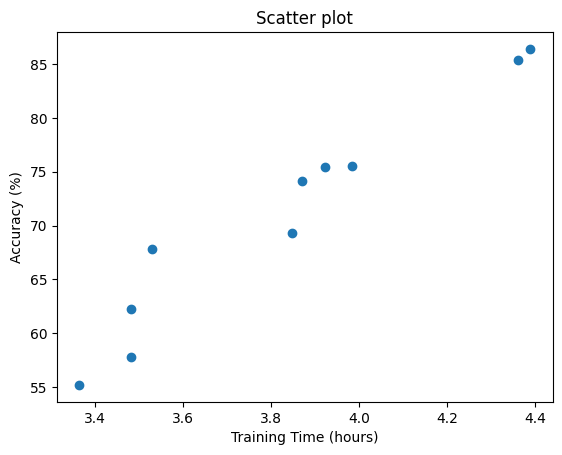

In [87]:
import numpy as np

np.random.seed(42)

n_samples = 10
mean_training_time = 3.6
std_training_time = 0.5
mean_accuracy = 82
std_accuracy = 14
correlation = 0.62

#asumam si noi ca vin dintr-o distributie normala
training_time = np.random.normal(mean_training_time, std_training_time, n_samples)
accuracy = np.random.normal(mean_accuracy, std_accuracy, n_samples)

#creca tre sa fie sortate ca tot face figuri
training_time.sort()
accuracy.sort()

plt.scatter(training_time, accuracy)
plt.xlabel("Training Time (hours)")
plt.ylabel("Accuracy (%)")
plt.title("Scatter plot")

plt.show()

Si acum facem in schimb regresie polinomiala

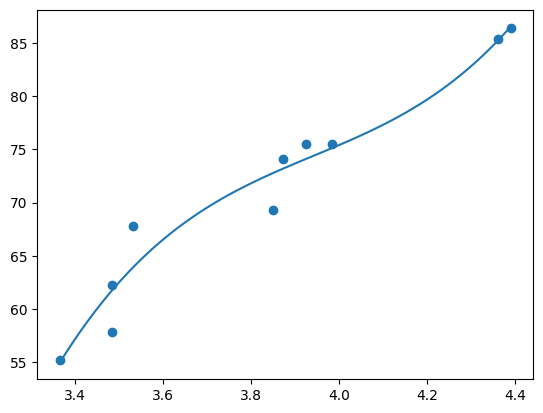

In [88]:
mymodel = np.poly1d(np.polyfit(training_time, accuracy, 3))

myline = np.linspace(training_time[0], training_time[-1], 100)

plt.scatter(training_time, accuracy)
plt.plot(myline, mymodel(myline))
plt.show()

eee alta viata


ia daca schimb tipul distributiei din care vin datele? in loc de normala, sa fie exponentiala spre exp

dupa cum stim despre exponentiala: "It describes many common situations, such as the size of raindrops measured over many rainstorms, or the time between page requests to Wikipedia"

Poate asa are sens sa modelam si care e timpu DINTRE training cycles, adica cat timp dureaza fiecare, poa sa fie parametrul acela de $1/\lambda$

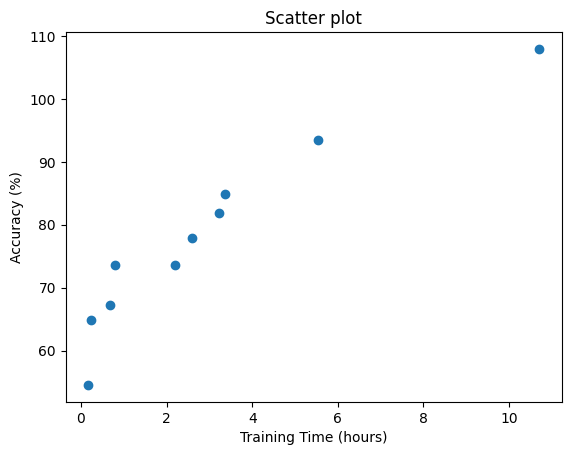

In [89]:

training_time = np.random.exponential(mean_training_time, n_samples)
#dar zic sa lasam accuracy-ul sa fie normal distribuit
accuracy = np.random.normal(mean_accuracy, std_accuracy, n_samples)

#creca tre sa fie sortate ca tot face figuri
training_time.sort()
accuracy.sort()

plt.scatter(training_time, accuracy)
plt.xlabel("Training Time (hours)")
plt.ylabel("Accuracy (%)")
plt.title("Scatter plot")

plt.show()


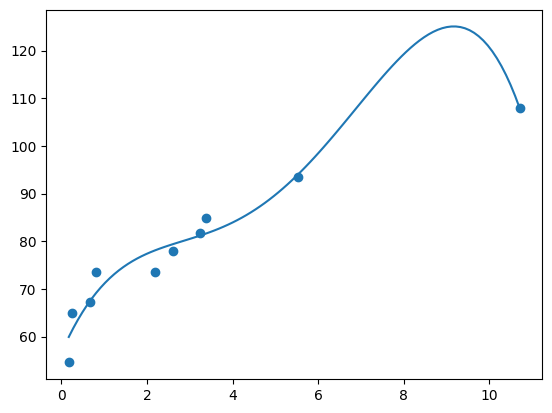

In [90]:
#si facem cu polinom de grad 4 daca tot
mymodel = np.poly1d(np.polyfit(training_time, accuracy, 4))

myline = np.linspace(training_time[0], training_time[-1], 100)

plt.scatter(training_time, accuracy)
plt.plot(myline, mymodel(myline))
plt.show()



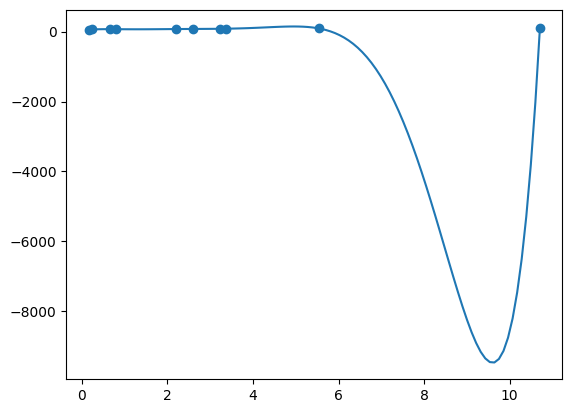

In [91]:
#ia si de grad si mai si mai mare?
mymodel = np.poly1d(np.polyfit(training_time, accuracy, 7))

plt.scatter(training_time, accuracy)
plt.plot(myline, mymodel(myline))
plt.show()


ok chiar incepe sa nu prea mai aiba sens